In [2]:
#%pip install h5py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from dataHandling import CustomDataset, getDataAsTensors, micro_path, test_path, val_path, train_path
import torch
from torch.utils.data import random_split

In [4]:
_testImgs, _testLabels, _testMax_val = getDataAsTensors(val_path)#Using validation set as test set as we split the training set into training and validation sets
test_dataset = CustomDataset(_testImgs, _testLabels)

imgs, labels, max_val = getDataAsTensors(train_path)
train_size = int(0.8 * len(imgs))
validation_size = len(imgs) - train_size
train_dataset, validation_dataset = random_split(CustomDataset(imgs, labels), [train_size, validation_size])

print(len(train_dataset))

Keys: <KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>
157080
Overall Max Pixel Value: 275.4703674316406
Overall Min Pixel Value: 0.0
imgs: torch.Size([157080, 25, 25]) , signals:  torch.Size([157080])
Keys: <KeysViewHDF5 ['image', 'jet_delta_R', 'jet_eta', 'jet_mass', 'jet_phi', 'jet_pt', 'signal', 'tau_1', 'tau_2', 'tau_21', 'tau_3', 'tau_32']>
628320
Overall Max Pixel Value: 284.6765441894531
Overall Min Pixel Value: 0.0
imgs: torch.Size([628320, 25, 25]) , signals:  torch.Size([628320])
502656


In [5]:
batch_size = 256
classes = ('general', 'W-boson')

trainDataLoader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
validationDataLoader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)
testDataLoader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)


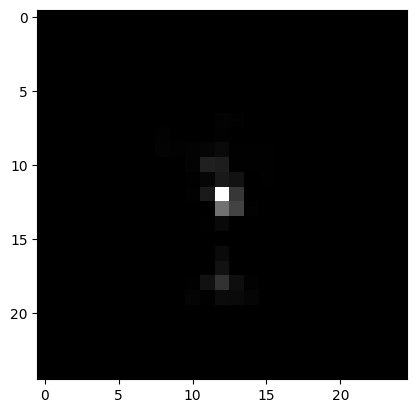

general W-boson general W-boson W-boson W-boson general general general general W-boson general general W-boson general W-boson W-boson general general W-boson W-boson general general general general W-boson general W-boson W-boson general W-boson general W-boson W-boson W-boson general W-boson general general general general general general W-boson general W-boson W-boson W-boson general general W-boson W-boson general W-boson general general general general general general W-boson general general W-boson general W-boson W-boson general general general W-boson general general general general W-boson general W-boson general general W-boson W-boson W-boson general W-boson general W-boson W-boson general W-boson W-boson W-boson general general W-boson general general W-boson general general general general general general W-boson general W-boson W-boson general W-boson W-boson W-boson general W-boson general general W-boson general W-boson W-boson general W-boson general general W-boson 

In [6]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')  # Display the first channel of the image grid and use grayscale colormap
    plt.show()

# Get some random training images
dataiter = iter(trainDataLoader)
images, labels = next(dataiter)
# Show images
imshow(images[0])
# Print labels
print(' '.join(f'{classes[int(labels[j].item())]:5s}' for j in range(batch_size)))

In [7]:
from models import BigCNN2

bigCNN = BigCNN2()
#bigCNN.train_model(trainDataLoader, epochs=8)
bigCNN.load_state_dict(torch.load('BigCNNmodel.pth'))
bigCNN.eval()  # Set the model to evaluation mode

BigCNN2(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(20, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(40, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(80, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2880, out_features=240, bias=True)
  (fc2): Linear(in_features=240, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=60, bias=True)
  (fc4): Linear(in_features=60, out_features=1, bias=True

In [8]:
torch.save(bigCNN.state_dict(), 'model.pth')

In [9]:
_preds, _preds_01, _labels = bigCNN.predictOnData(validationDataLoader)

Accuracy of the network on the test images: 82.94 %


In [10]:
torch.save(bigCNN.state_dict(), 'BigCNNmodel.pth')

In [11]:
test_preds, test_preds_01, test_labels = bigCNN.predictOnData(testDataLoader)

Accuracy of the network on the test images: 82.68 %


In [12]:
from monteCarlo import MonteCarloDropoutModel

MCDM = MonteCarloDropoutModel(model=bigCNN,
                                data_loader=validationDataLoader,
                                n_samples=validation_size, forward_passes=100, adjust_dropout=0.1)#Default forward_passes=20, n_classes=1

mean, std, mutual_info, dropout_predictions = MCDM.get_monte_carlo_predictions()

pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5
pass: 6
pass: 7
pass: 8
pass: 9
pass: 10
pass: 11
pass: 12
pass: 13
pass: 14
pass: 15
pass: 16
pass: 17
pass: 18
pass: 19
pass: 20
pass: 21
pass: 22
pass: 23
pass: 24
pass: 25
pass: 26
pass: 27
pass: 28
pass: 29
pass: 30
pass: 31
pass: 32
pass: 33
pass: 34
pass: 35
pass: 36
pass: 37
pass: 38
pass: 39
pass: 40
pass: 41
pass: 42
pass: 43
pass: 44
pass: 45
pass: 46
pass: 47
pass: 48
pass: 49
pass: 50
pass: 51
pass: 52
pass: 53
pass: 54
pass: 55
pass: 56
pass: 57
pass: 58
pass: 59
pass: 60
pass: 61
pass: 62
pass: 63
pass: 64
pass: 65
pass: 66
pass: 67
pass: 68
pass: 69
pass: 70
pass: 71
pass: 72
pass: 73
pass: 74
pass: 75
pass: 76
pass: 77
pass: 78
pass: 79
pass: 80
pass: 81
pass: 82
pass: 83
pass: 84
pass: 85
pass: 86
pass: 87
pass: 88
pass: 89
pass: 90
pass: 91
pass: 92
pass: 93
pass: 94
pass: 95
pass: 96
pass: 97
pass: 98
pass: 99


In [36]:
# Convert predictions to binary values (0 or 1)
predictedMCDMean = (mean > 0.5).astype(float)

# Count the number of correct predictions
meanCorrect = np.sum(predictedMCDMean == _labels)

# Calculate accuracy
total_samples = _labels.shape[0]  # Ensure this is the correct total number of samples
meanAccuracy = 100 * meanCorrect / total_samples

print(f'Accuracy of mean MCD predictions on the validation images: {meanAccuracy:.2f}%')


Accuracy of mean MCD predictions on the validation images: 83.06%


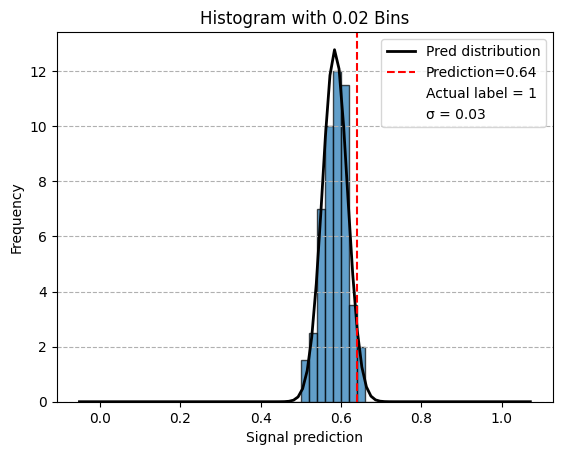

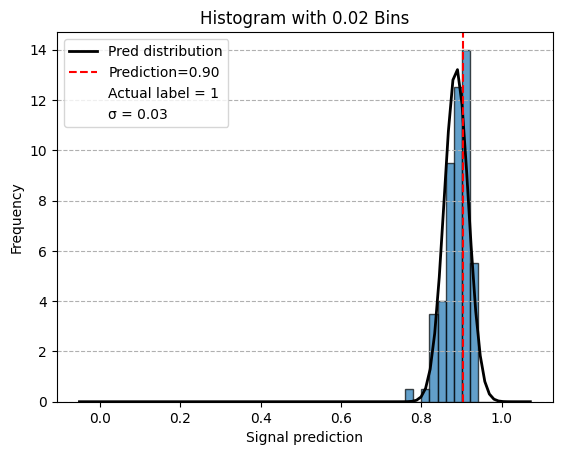

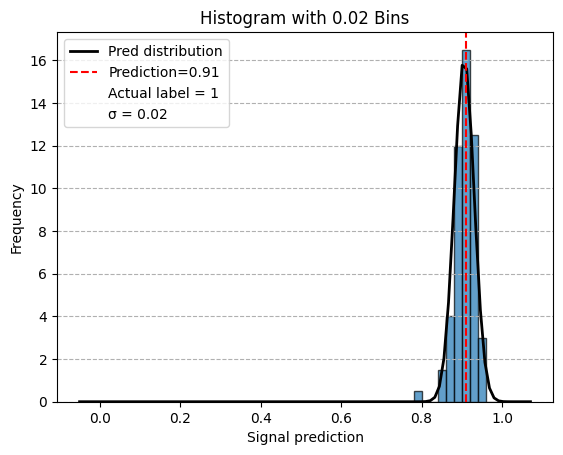

In [13]:
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_histogram(values, label, threshold=0.02, original_prediction=None, std=None, show_legend=True, show_curve=True):
    # Ensure all values are between 0 and 1
    filtered_values = [v for v in values if 0 <= v <= 1]

    # Set the bin edges based on the given threshold
    bins = [i*threshold for i in range(int(1/threshold) + 2)]  # +2 to include the upper bound

    # Calculate the histogram data without plotting
    y, x, _ = plt.hist(filtered_values, bins=bins, edgecolor='black', alpha=0.7, density=True)
    plt.xlabel('Signal prediction')
    plt.ylabel('Frequency')
    plt.title(f'Histogram with {threshold} Bins')
    plt.grid(axis='y', linestyle='--')

    # Plot Gaussian distribution if show_curve is True
    if show_curve:
        mean = np.mean(filtered_values)
        std = std or np.std(filtered_values)  # Use provided std or calculate if not provided
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mean, std)
        plt.plot(x, p, 'k', linewidth=2, label="Pred distribution")

    # Add original prediction line if provided
    if original_prediction is not None:
        plt.axvline(x=original_prediction, color='red', linestyle='--', label=f'Prediction={original_prediction:.2f}')

    # Add legend if show_legend is True
    if show_legend:
        current_handles, current_labels = plt.gca().get_legend_handles_labels()
        if label is not None:
            current_labels.append(f'Actual label = {label:.0f}')
            current_handles.append(plt.Rectangle((0, 0), 0, 0, fc="white", fill=False, edgecolor='none', linewidth=0))
        if show_curve and std is not None:
            current_labels.append(f'σ = {std:.2f}')
            current_handles.append(plt.Rectangle((0, 0), 0, 0, fc="white", fill=False, edgecolor='none', linewidth=0))
        plt.legend(handles=current_handles, labels=current_labels)

    plt.show()

# Example
indexToInspect = 21
values = dropout_predictions[:, indexToInspect]
plot_histogram(values, original_prediction=_preds[indexToInspect], std=std[indexToInspect], label=_labels[indexToInspect])
indexToInspect = 211
values = dropout_predictions[:, indexToInspect]
plot_histogram(values, original_prediction=_preds[indexToInspect], std=std[indexToInspect], label=_labels[indexToInspect])
indexToInspect= 91377
values = dropout_predictions[:, indexToInspect]
plot_histogram(values, original_prediction=_preds[indexToInspect], std=std[indexToInspect], label=_labels[indexToInspect])

In [14]:
def find_matching_indices(list2, list1):
    """Find indices where value in list1 is <0.05 and value in list2 is between 0.4 and 0.5."""
    matching_indices = []
    
    # Iterate over both lists simultaneously
    for idx, (val1, val2) in enumerate(zip(list1, list2)):
        if val1 < 0.04 and 0.41 <= val2 <= 0.45:
            matching_indices.append(idx)
            
    return matching_indices
print(find_matching_indices(_preds, std))  # This should print [0, 2]

[4, 68, 97, 99, 113, 118, 228, 341, 439, 463, 578, 754, 1027, 1066, 1325, 1341, 1370, 1619, 1728, 1887, 1906, 1932, 2024, 2083, 2113, 2184, 2304, 2326, 2411, 2689, 2832, 2962, 3054, 3078, 3139, 3195, 3214, 3278, 3284, 3298, 3304, 3364, 3815, 3830, 3847, 3902, 3905, 3950, 4000, 4017, 4150, 4237, 4314, 4344, 4368, 4396, 4440, 4448, 4544, 4579, 4581, 4679, 4682, 4967, 4993, 5148, 5217, 5233, 5553, 5560, 5566, 6124, 6171, 6179, 6428, 6457, 6471, 6537, 6582, 6618, 6659, 6825, 6903, 6950, 7040, 7041, 7093, 7182, 7299, 7304, 7332, 7472, 7676, 8079, 8246, 8267, 8597, 8619, 8624, 8664, 8671, 8812, 8862, 8902, 8932, 8963, 9131, 9296, 9335, 9391, 9427, 9690, 9833, 10035, 10266, 10322, 10327, 10443, 10535, 10548, 10823, 10826, 10898, 10906, 10907, 10936, 11008, 11236, 11246, 11306, 11335, 11429, 11512, 11643, 11677, 11697, 11705, 11770, 11861, 11874, 12031, 12417, 12420, 12439, 12482, 12609, 12709, 12807, 12886, 12974, 13261, 13288, 13641, 13752, 13867, 13868, 13898, 14288, 14316, 14421, 14541, 14

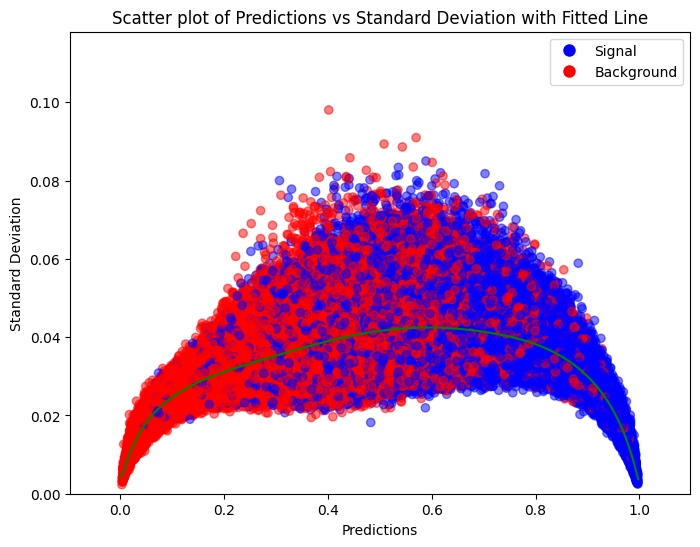

In [15]:
def scatter_plot(preds, std, labels, degree=2):
    if len(preds) != len(std) or len(preds) != len(labels):
        print("All lists should have the same length!")
        return
    
    # Create a list of colors based on the correctness of predictions
    colors = ['blue' if ( l == 1) else 'red' for p, l in zip(preds, labels)]
    
    plt.figure(figsize=(8, 6))
    plt.scatter(preds, std, color=colors, alpha=0.5)
    
    # Fit a line to the data
    coefficients = np.polyfit(preds, std, degree)
    polynomial = np.poly1d(coefficients)
    
    # Generate y-values based on the fitted polynomial
    xs = np.linspace(min(preds), max(preds), 500)
    fitted_y = polynomial(xs)
    
    # Plot the fitted polynomial
    plt.plot(xs, fitted_y, color='green', label=f'Fitted Polynomial (Degree {degree})')
    
    # Create a custom legend
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', label='Signal', markersize=10, markerfacecolor='blue')
    red_patch = plt.Line2D([0], [0], marker='o', color='w', label='Background', markersize=10, markerfacecolor='red')
    plt.legend(handles=[blue_patch, red_patch])
    
    plt.xlabel("Predictions")
    plt.ylabel("Standard Deviation")
    plt.title("Scatter plot of Predictions vs Standard Deviation with Fitted Line")
    plt.xlim([min(preds)-0.1, max(preds)+0.1])  # assuming predictions are between 0 and 1
    plt.ylim([0, max(std)+0.02])
    plt.show()
    
scatter_plot(_preds, std, _labels, 12)  # Make sure you also provide the 'labels' list when calling the function

(125664,) torch.Size([256])


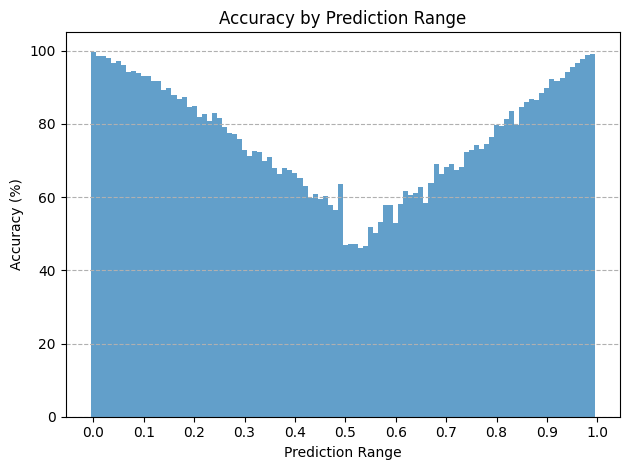

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracy_histogram(predictions, labels, bin_size=0.05):
    if len(predictions) != len(labels):
        print("Predictions and labels must have the same length!")
        return
    
    # Grouping the predictions in bins
    bins = np.arange(0, 1 + bin_size, bin_size)
    bin_indices = np.digitize(predictions, bins) - 1
    
    correct_counts = np.zeros_like(bins[:-1])
    total_counts = np.zeros_like(bins[:-1])
    
    for pred, label in zip(predictions, labels):
        bin_index = min(int(pred / bin_size), len(bins) - 2)  # Ensure it's within range
        if (pred > 0.5 and label == 1) or (pred <= 0.5 and label == 0):
            correct_counts[bin_index] += 1
        total_counts[bin_index] += 1
    
    # Calculating accuracy for each bin
    accuracies = np.divide(correct_counts, total_counts, out=np.zeros_like(correct_counts), where=total_counts!=0) * 100
    
    # Plotting the histogram
    plt.bar(bins[:-1], accuracies, width=bin_size, alpha=0.7)
    plt.xlabel('Prediction Range')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy by Prediction Range')
    plt.ylim(0, 105)  # To make the y-axis range from 0 to 105 for clarity
    plt.grid(axis='y', linestyle='--')

    # Set x-ticks every 0.1 and remove bin labels
    plt.xticks(np.arange(0, 1.1, 0.1))

    plt.tight_layout()
    plt.show()

# Sample usage (assuming _preds and _labels are defined somewhere in your code):
# print(_preds.shape, labels.shape)
# plot_accuracy_histogram(_preds, _labels, bin_size=0.005)



print(_preds.shape, labels.shape)
plot_accuracy_histogram(_preds, _labels, bin_size=0.01)


In [17]:
mean2, std2, mutual_info2, dropout_predictions2 = MCDM.get_monte_carlo_predictions()

pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5
pass: 6
pass: 7
pass: 8
pass: 9
pass: 10
pass: 11
pass: 12
pass: 13
pass: 14
pass: 15
pass: 16
pass: 17
pass: 18
pass: 19
pass: 20
pass: 21
pass: 22
pass: 23
pass: 24
pass: 25
pass: 26
pass: 27
pass: 28
pass: 29
pass: 30
pass: 31
pass: 32
pass: 33
pass: 34
pass: 35
pass: 36
pass: 37
pass: 38
pass: 39
pass: 40
pass: 41
pass: 42
pass: 43
pass: 44
pass: 45
pass: 46
pass: 47
pass: 48
pass: 49
pass: 50
pass: 51
pass: 52
pass: 53
pass: 54
pass: 55
pass: 56
pass: 57
pass: 58
pass: 59
pass: 60
pass: 61
pass: 62
pass: 63
pass: 64
pass: 65
pass: 66
pass: 67
pass: 68
pass: 69
pass: 70
pass: 71
pass: 72
pass: 73
pass: 74
pass: 75
pass: 76
pass: 77
pass: 78
pass: 79
pass: 80
pass: 81
pass: 82
pass: 83
pass: 84
pass: 85
pass: 86
pass: 87
pass: 88
pass: 89
pass: 90
pass: 91
pass: 92
pass: 93
pass: 94
pass: 95
pass: 96
pass: 97
pass: 98
pass: 99


In [18]:
mean3, std3, mutual_info3, dropout_predictions3 = MCDM.get_monte_carlo_predictions()

pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5
pass: 6
pass: 7
pass: 8
pass: 9
pass: 10
pass: 11
pass: 12
pass: 13
pass: 14
pass: 15
pass: 16
pass: 17
pass: 18
pass: 19
pass: 20
pass: 21
pass: 22
pass: 23
pass: 24
pass: 25
pass: 26
pass: 27
pass: 28
pass: 29
pass: 30
pass: 31
pass: 32
pass: 33
pass: 34
pass: 35
pass: 36
pass: 37
pass: 38
pass: 39
pass: 40
pass: 41
pass: 42
pass: 43
pass: 44
pass: 45
pass: 46
pass: 47
pass: 48
pass: 49
pass: 50
pass: 51
pass: 52
pass: 53
pass: 54
pass: 55
pass: 56
pass: 57
pass: 58
pass: 59
pass: 60
pass: 61
pass: 62
pass: 63
pass: 64
pass: 65
pass: 66
pass: 67
pass: 68
pass: 69
pass: 70
pass: 71
pass: 72
pass: 73
pass: 74
pass: 75
pass: 76
pass: 77
pass: 78
pass: 79
pass: 80
pass: 81
pass: 82
pass: 83
pass: 84
pass: 85
pass: 86
pass: 87
pass: 88
pass: 89
pass: 90
pass: 91
pass: 92
pass: 93
pass: 94
pass: 95
pass: 96
pass: 97
pass: 98
pass: 99


In [19]:
mean4, std4, mutual_info4, dropout_predictions4 = MCDM.get_monte_carlo_predictions()

pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5
pass: 6
pass: 7
pass: 8
pass: 9
pass: 10
pass: 11
pass: 12
pass: 13
pass: 14
pass: 15
pass: 16
pass: 17
pass: 18
pass: 19
pass: 20
pass: 21
pass: 22
pass: 23
pass: 24
pass: 25
pass: 26
pass: 27
pass: 28
pass: 29
pass: 30
pass: 31
pass: 32
pass: 33
pass: 34
pass: 35
pass: 36
pass: 37
pass: 38
pass: 39
pass: 40
pass: 41
pass: 42
pass: 43
pass: 44
pass: 45
pass: 46
pass: 47
pass: 48
pass: 49
pass: 50
pass: 51
pass: 52
pass: 53
pass: 54
pass: 55
pass: 56
pass: 57
pass: 58
pass: 59
pass: 60
pass: 61
pass: 62
pass: 63
pass: 64
pass: 65
pass: 66
pass: 67
pass: 68
pass: 69
pass: 70
pass: 71
pass: 72
pass: 73
pass: 74
pass: 75
pass: 76
pass: 77
pass: 78
pass: 79
pass: 80
pass: 81
pass: 82
pass: 83
pass: 84
pass: 85
pass: 86
pass: 87
pass: 88
pass: 89
pass: 90
pass: 91
pass: 92
pass: 93
pass: 94
pass: 95
pass: 96
pass: 97
pass: 98
pass: 99


In [20]:
print(mean4[2])

0.8915291684865951


In [23]:

class MCDropoutPrediction:
    def __init__(self, inverse_i, mean, std, mutual_info, predictions):
        self.inverse_i = inverse_i
        self.mean = mean
        self.std = std
        self.mutual_info = mutual_info
        self.predictions = predictions

MCDropoutPredictionList = []

for i in range(1, 9):  
    print(i)
    MCDM = MonteCarloDropoutModel(model=bigCNN, data_loader=validationDataLoader, n_samples=validation_size, forward_passes=30, adjust_dropout=1/i)
    mean, std, mutual_info, dropout_predictions = MCDM.get_monte_carlo_predictions()
    
    prediction_data = MCDropoutPrediction(1/i, mean, std, mutual_info, dropout_predictions)
    MCDropoutPredictionList.append(prediction_data)

MCDM = MonteCarloDropoutModel(model=bigCNN, data_loader=validationDataLoader, n_samples=validation_size, forward_passes=30, adjust_dropout=0.05)
mean, std, mutual_info, dropout_predictions = MCDM.get_monte_carlo_predictions()
prediction_data = MCDropoutPrediction(0.05, mean, std, mutual_info, dropout_predictions)
MCDropoutPredictionList.append(prediction_data)

MCDM = MonteCarloDropoutModel(model=bigCNN, data_loader=validationDataLoader, n_samples=validation_size, forward_passes=30, adjust_dropout=0.95)
mean, std, mutual_info, dropout_predictions = MCDM.get_monte_carlo_predictions()
prediction_data = MCDropoutPrediction(0.95, mean, std, mutual_info, dropout_predictions)
MCDropoutPredictionList.append(prediction_data)



1
pass: 0
pass: 1
pass: 2
pass: 3
pass: 4
pass: 5


KeyboardInterrupt: 

In [22]:
import pickle

# Function to save a variable using pickle
def save_variable(variable, filename):
    with open(filename, 'wb') as file:
        pickle.dump(variable, file)

# Save version 1 variables
save_variable(mean, 'mean.pkl')
save_variable(std, 'std.pkl')
save_variable(mutual_info, 'mutual_info.pkl')
save_variable(dropout_predictions, 'dropout_predictions.pkl')

# Save version 2 variables
save_variable(mean2, 'mean2.pkl')
save_variable(std2, 'std2.pkl')
save_variable(mutual_info2, 'mutual_info2.pkl')
save_variable(dropout_predictions2, 'dropout_predictions2.pkl')

# Save version 3 variables
save_variable(mean3, 'mean3.pkl')
save_variable(std3, 'std3.pkl')
save_variable(mutual_info3, 'mutual_info3.pkl')
save_variable(dropout_predictions3, 'dropout_predictions3.pkl')

# Save version 4 variables
save_variable(mean4, 'mean4.pkl')
save_variable(std4, 'std4.pkl')
save_variable(mutual_info4, 'mutual_info4.pkl')
save_variable(dropout_predictions4, 'dropout_predictions4.pkl')


save_variable(MCDropoutPredictionList, 'MCDropoutPredictionList.pkl')



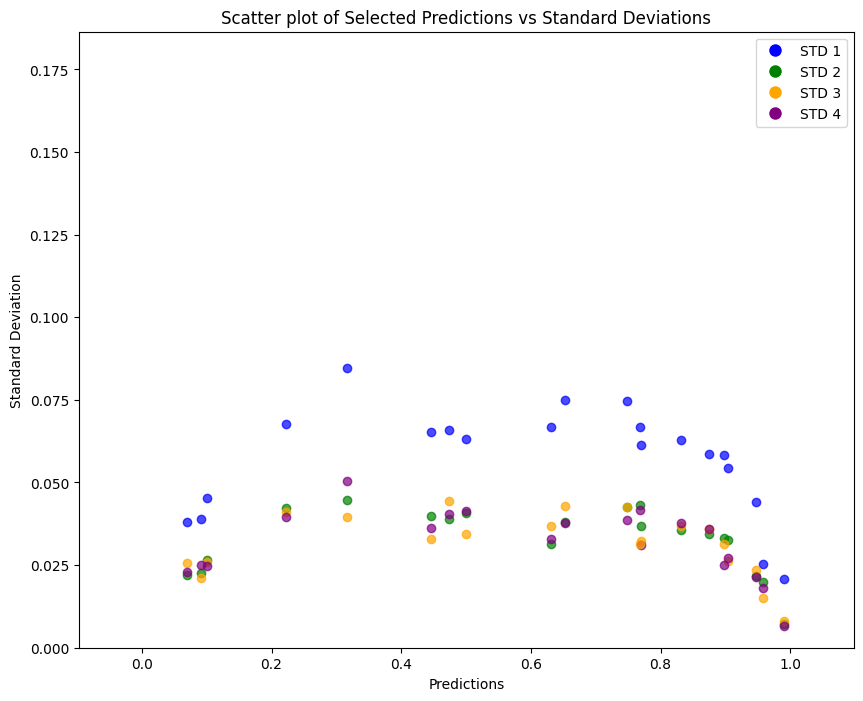

In [32]:
from graphFunctions import scatter_plot_with_4_stds
scatter_plot_with_4_stds(_preds, std, std2, std3, std4, _labels, 20)


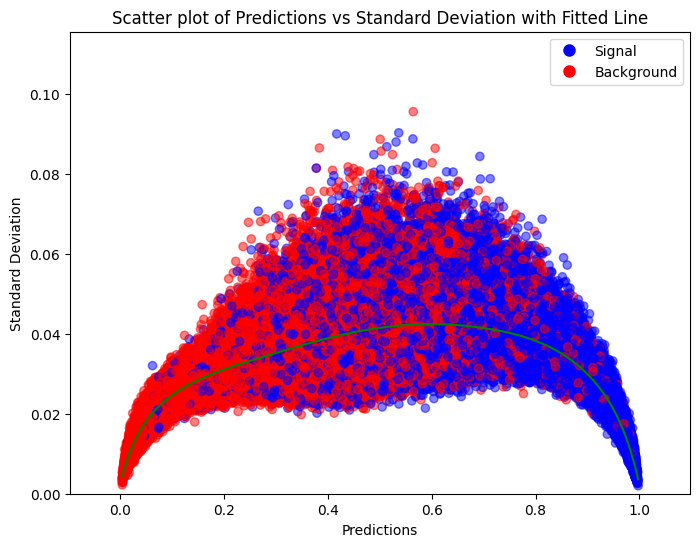

In [27]:
scatter_plot(_preds, std3, _labels, 12) 

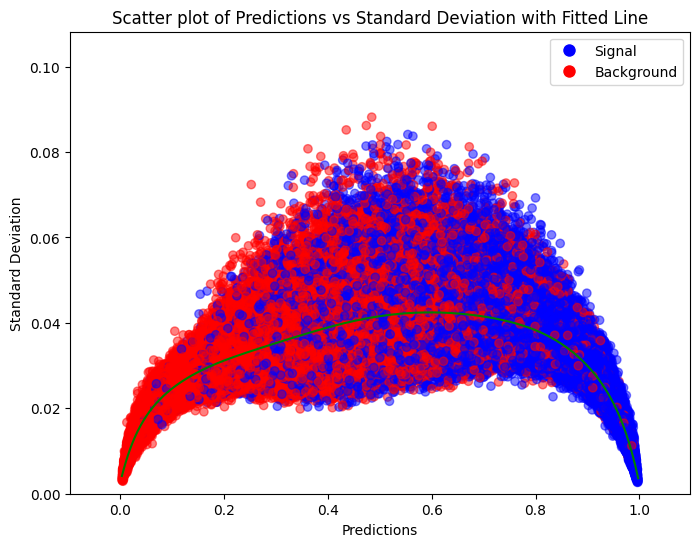

In [28]:
scatter_plot(_preds, std4, _labels, 12) 

In [39]:
# Convert predictions to binary values (0 or 1)
predictedMCDMean = (mean4 > 0.5).astype(float)

# Count the number of correct predictions
meanCorrect = np.sum(predictedMCDMean == _labels)

# Calculate accuracy
total_samples = _labels.shape[0]  # Ensure this is the correct total number of samples
meanAccuracy = 100 * meanCorrect / total_samples

print(f'Accuracy of mean MCD predictions on the validation images: {meanAccuracy:.2f}%')

Accuracy of mean MCD predictions on the validation images: 83.06%
